<a href="https://colab.research.google.com/github/Tiff923/Music-Generation/blob/main/Naive_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from music21 import converter, instrument, note, chord
import pickle
import glob

def get_notes():
    """ Get all the notes and chords from the midi files in the ./midi_songs directory """
    notes = []

    for file in glob.glob("/content/gdrive/My Drive/Colab Notebooks/CDS 2020/CDS Project 2020/Data/midi/*.mid"):
      midi = converter.parse(file)

      notes_to_parse = None

      try: # file has instrument parts
        s2 = instrument.partitionByInstrument(midi)
        notes_to_parse = s2.parts[0].recurse() 
      except: # file has notes in a flat structure
        notes_to_parse = midi.flat.notes

      for element in notes_to_parse:
        if isinstance(element, note.Note):
          notes.append(str(element.pitch))
        elif isinstance(element, chord.Chord):
          notes.append('.'.join(str(n) for n in element.normalOrder))

    with open('/content/gdrive/My Drive/Colab Notebooks/CDS 2020/CDS Project 2020/Data/notes', 'wb') as filepath:
        pickle.dump(notes, filepath)

    return notes

notes = get_notes()
print(notes[:200])

['A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'D4', '2', 'D4', 'D4', 'F4', 'A3', 'B-3', 'D4', 'D4', 'D4', 'F4', 'A3', 'B-3', 'D4', 'D4', 'D4', 'F4', 'A3', 'B-3', 'D4', 'D4', 'D4', 'F4', 'A3', 'B-3', 'B-3', 'G2', 'G3', 'B-3', 'B-3', 'D4', 'G3', 'F4', 'B-3', 'A3', 'B-3', 'B-3', 'D4', 'G3', 'F4', 'B-3', '2', 'A3', 'D2', 'D3', '2', 'D4', 'D4', 'F4', 'B-3', 'D5', 'D5', 'D4', '2', 'D3', '2', 'D4', 'D4', 'F4', 'A3', 'B-3', 'B-3', 'G4', 'G2', 'G3', 'B-3', 'B-3', 'D4', 'G3', 'F4', 'B-3', 'A4', 'A3', 'B-3', 'B-3', 'D4', 'G3', 'F4', 'B-4', 'B-3', 'D4', 'A4', '9.2', 'D4', 'D4', 'F4', 'A3', 'B-3', 'D4', 'D2', 'D4', 'D4', 'F4', 'A3', 'B-3', 'D4', '2', 'D4', 'D4', '11', 'B-7', 'F#5', 'F#7', 'F7', '7.11', 'F#7', 'F#5', 'D7', 'C#7', '11.2', 'C#7', 'F#5', 'B-6', 'B6', 'F#6', 'F6', '6.11', '11', 'B6', 'B-7', 'F#5', 'F#7', '5', '7.11', 'F#6', 'F#7', 'F#5', 'D7', '1.7', '11.2', 'F#6', 'C#7', 'F#5', 'B-6', 'B6', '1.7', '6.11', '11', '6.10', '6.7', 'F7', 'B4', 'F#5', 'G5', '7.11', '6', '2.7', 'C#7', 'B4',

In [ ]:
import numpy 

def prepare_sequences(notes, n_vocab):
  sequence_length = 100

  # get all pitch names 
  pitchnames=sorted(set(notes))

  # create a dictionary to map pitches to integers 
  notes_to_int = dict([(note, number) for number, note in enumerate(pitchnames)])

  network_input = []
  network_output = []

  # create input sequences and the corresponding outputs 
  for i in range(0, len(notes)- sequence_length):
    sequence_in = notes[i : i+sequence_length]
    sequence_out = notes[i+sequence_length]
    network_input.append([notes_to_int[char] for char in sequence_in])
    network_output.append(notes_to_int[sequence_out])
  
  n_network_input = len(network_input)

  # reshape input into a format compatible with LSTM layers 
  network_input = numpy.reshape(network_input, (n_network_input, sequence_length, 1))
  # normalise input 
  network_input = network_input/n_vocab 

  network_output = np_utils.to_categorical(network_output)

  return network_input, network_output

# n_vocab = len(set(notes))
# i, i_norm = prepare_sequences(notes,n_vocab)
# print(numpy.max(i_norm))




In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils

def create_network(network_input, n_vocab):
  print(type(network_input))
  model = Sequential()
  model.add(LSTM(
          512,
          input_shape=(network_input.shape[1], network_input.shape[2])
  ))
  model.add(Dropout(0.3))
  model.add(Dense(n_vocab, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam')

  return model 


def train(model, network_input, network_output):
  model.fit(network_input, network_output, epochs=50, batch_size=128)
  model.save('/content/gdrive/My Drive/Colab Notebooks/CDS 2020/CDS Project 2020/LSTM_model')
  return 


def train_network():
  notes = get_notes()
  n_vocab = len(set(notes))
  network_input, network_output = prepare_sequences(notes, n_vocab)
  model = create_network(network_input, n_vocab)
  train(model, network_input, network_output) 
  return 

train_network()


<class 'numpy.ndarray'>
Epoch 1/50
874/874 [==============================] - 28s 32ms/step - loss: 4.7200
Epoch 2/50
874/874 [==============================] - 30s 34ms/step - loss: 4.6241
Epoch 3/50
874/874 [==============================] - 30s 34ms/step - loss: 4.5162
Epoch 4/50
874/874 [==============================] - 29s 34ms/step - loss: 4.4830
Epoch 5/50
874/874 [==============================] - 30s 34ms/step - loss: 4.4362
Epoch 6/50
874/874 [==============================] - 29s 33ms/step - loss: 4.3619
Epoch 7/50
874/874 [==============================] - 29s 33ms/step - loss: 4.2939
Epoch 8/50
874/874 [==============================] - 29s 34ms/step - loss: 4.2107
Epoch 9/50
874/874 [==============================] - 29s 34ms/step - loss: 4.1558
Epoch 10/50
874/874 [==============================] - 30s 34ms/step - loss: 4.0056
Epoch 11/50
874/874 [==============================] - 30s 34ms/step - loss: 3.8758
Epoch 12/50
874/874 [==============================] - 30s 34

In [ ]:
import numpy

def prepare_sequences(notes):
  sequence_length = 100

  pitchnames=sorted(set(notes))

  notes_to_int = dict([(note, number) for number, note in enumerate(pitchnames)])

  network_input = []
  output = []

  for i in range(0, len(notes)- sequence_length):
    sequence_in = notes[i : i+sequence_length]
    sequence_out = notes[i+sequence_length]
    network_input.append([notes_to_int[char] for char in sequence_in])
    output.append(notes_to_int[sequence_out])
  
  return network_input 

In [ ]:
import numpy 
from keras.models import load_model

def generate_note(model_filePath, network_input, pitchnames, n_vocab):
  model = load_model(model_filePath)

  int_to_note = dict([(number, note) for number, note in enumerate(pitchnames)])

  start = numpy.random.randint(0, len(network_input)-1)
  pattern = network_input[start]
  prediction_output = []

  # generate 500 notes 
  for note_index in range(500):
    prediction_input = numpy.reshape(pattern, (1, len(pattern), 1))
    prediction_input = prediction_input/float(n_vocab)

    prediction = model.predict(prediction_input)

    index = numpy.argmax(prediction)
    result = int_to_note[index]
    prediction_output.append(result)

    pattern.append(index)
    pattern = pattern[1:len(pattern)]

  return prediction_output 


In [ ]:
from music21 import converter, instrument, note, chord, stream

def create_midi(prediction_output):
    """ convert the output from the prediction to notes and create a midi file
        from the notes """
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(int(current_note))
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        # pattern is a note
        else:
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 0.5

    midi_stream = stream.Stream(output_notes)

    midi_stream.write('midi', fp='test_output.mid')

In [ ]:
import pickle 

def generate():
  with open('/content/gdrive/My Drive/Colab Notebooks/CDS 2020/CDS Project 2020/Data/notes', 'rb') as filepath:
    notes = pickle.load(filepath)
  
  n_vocab = len(set(notes))
  pitchnames=sorted(set(notes))

  network_input = prepare_sequences(notes) 
  prediction_output = generate_note('/content/gdrive/My Drive/Colab Notebooks/CDS 2020/CDS Project 2020/LSTM_model', network_input, pitchnames, n_vocab)
  create_midi(prediction_output)

  return 

generate()





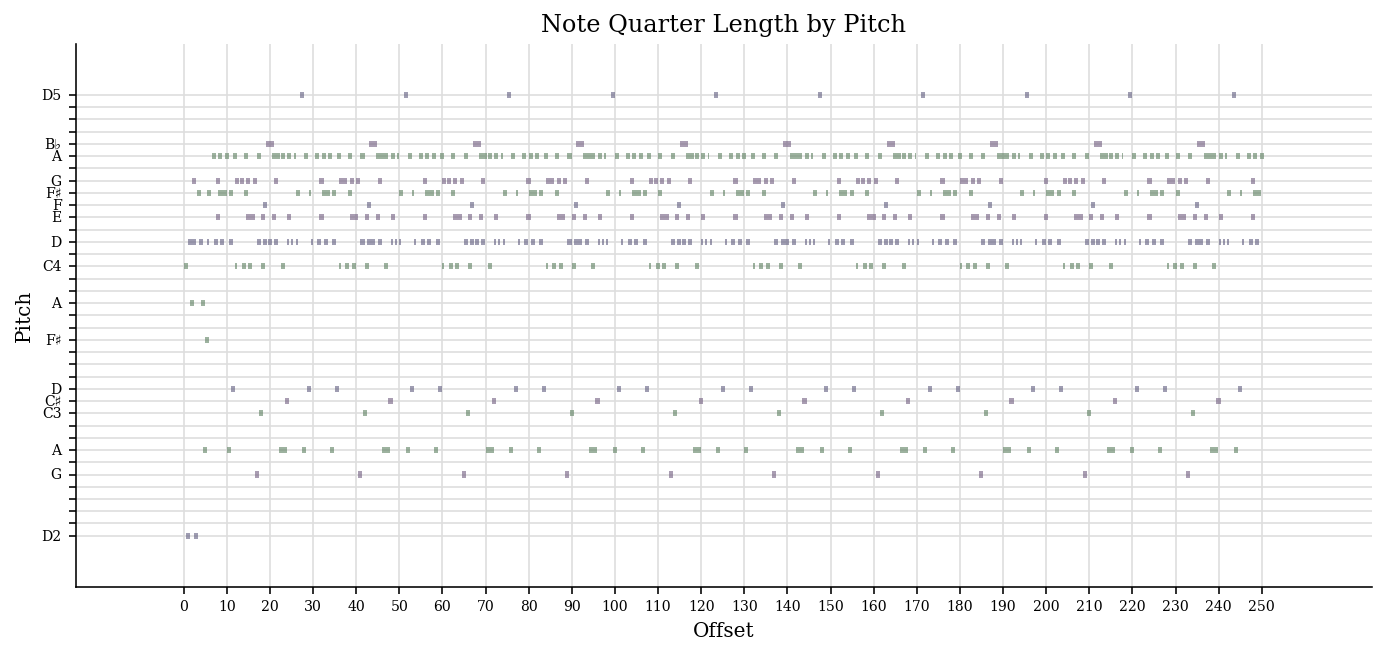

In [ ]:
import music21 as m21

s = m21.converter.parse('/content/gdrive/My Drive/Colab Notebooks/CDS 2020/CDS Project 2020/Output/test_output_1.mid')
s.plot('pianoroll', figureSize=(12, 5))
